# Import Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, average_precision_score, precision_score, recall_score, roc_auc_score
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
import seaborn as sns

# Import Data

In [ ]:
df_raw = pd.read_csv("dataset.csv", encoding="cp1252")

In [4]:
df_raw.head()

,employee_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,has_left
0,1,I,Country / Regional Marketing,Marketing & Communication,Country / Regional Marketing,3.0,5.0,11,44,Male,Chinese,1,Marr.,94,1
1,2,I,Country / Regional Marketing,Marketing & Communication,Country / Regional Marketing,7.0,10.0,10,33,Female,Chinese,0,Single,132,1
2,3,M,Accounting,Finance,Accounting,6.0,5.0,11,34,Female,Chinese,0,Not known,125,1
3,4,I,Supervisor,Sales,Retail,7.0,4.0,11,37,Female,Chinese,1,Marr.,102,1
4,5,I,Supervisor,Sales,Retail,7.0,6.0,12,39,Female,Chinese,1,Marr.,91,1


In [38]:
df_raw.describe()

,employee_id,f5,f6,f8,f11,f13,has_left
count,4541.00000,4520.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000
mean,2277.49967,7.590044,2.288813,32.892755,0.061000,102.708875,0.423695
std,1316.14795,1.732584,2.284957,5.460728,0.258811,22.049539,0.494198
min,1.00000,1.000000,0.500000,18.000000,0.000000,65.000000,0.000000
25%,1138.00000,7.000000,0.500000,29.000000,0.000000,84.000000,0.000000
50%,2278.00000,8.000000,1.000000,32.000000,0.000000,103.000000,0.000000
75%,3416.00000,9.000000,3.000000,36.000000,0.000000,122.000000,1.000000
max,4557.00000,12.000000,18.000000,67.000000,3.000000,140.000000,1.000000


# Exploratory Data Analysis

## Null Values

In [79]:
# Null values
print("Missing records in each column:\n%s\n" % df_raw.isnull().sum())
print("Percentage of missing records = %.1f%%" % (df_raw.isnull().sum()[df_raw.isnull().sum() > 0].sum()/len(df_raw) * 100))

Missing records in each column:
employee_id     0
f1              0
f2              0
f3              0
f4              0
f5             21
f6              0
f7              0
f8              0
f9              0
f10             0
f11             0
f12             0
f13             0
has_left        0
dtype: int64

Percentage of missing records = 0.5%


Because the percentage of missing records is so low (0.5%), it is a fair option to exclude these values from further analysis, rather than trying to impute them. Imputation, particularly without context and business knowledge as is the case with this analysis, is likely to add noise to further analysis rather than improve it. 

In [42]:
# visual inspection of the 21 records with missing values for f5
df_raw.loc[df_raw["f5"].isnull()]

,employee_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,has_left
1608,1612,D,Not assigned,Sales,Retail,NaN,0.5,0.5,35,Male,Chinese,0,Not known,130,1
1794,1798,M,Health & Safety,Building & Offices,Health & Safety,NaN,0.5,3,32,Male,Chinese,0,Not known,125,1
1795,1799,M,Building & Offices External,Building & Offices,Health & Safety,NaN,0.5,3,49,Female,Chinese,0,Not known,113,1
1796,1800,M,Building & Offices External,Building & Offices,Health & Safety,NaN,0.5,3,44,Male,Chinese,0,Not known,71,1
2813,2822,C,Business Development Manager,Sales,Sales General,NaN,0.5,2,29,Female,South African,0,Single,98,0
3075,3085,C,Boutique Assistant,Sales,Retail,NaN,0.5,4,32,Female,Chinese,0,Marr.,91,0
3946,3961,M,Building & Offices External,Building & Offices,Building & Offices General,NaN,1.0,1,27,Male,Chinese,0,Not known,127,0
3998,4014,M,Building & Offices External,Building & Offices,Building & Offices General,NaN,1.0,4,36,Female,Chinese,0,Not known,97,0
3999,4015,M,Building & Offices External,Building & Offices,Building & Offices General,NaN,1.0,2,32,Female,Chinese,0,Not known,92,0
4000,4016,M,Building & Offices External,Building & Offices,Building & Offices General,NaN,1.0,2,42,Male,Chinese,0,Not known,93,0


There does not seem to be a clear commonality between these records, i.e. no column here has identical records.

## Basic eda function

In [13]:
def basic_eda(df, col):
    print("Column = %s" % col)
    print("Data type = %s" % df_raw[col].dtype)
    plotting = True
    if df_raw[col].dtype == object:
        n_classes = df_raw[col].nunique()
        print("There are %s classes in the %s column" % (n_classes, col))
        
        if n_classes < 30:
            df_raw[col].value_counts().sort_values().plot.barh(color="royalblue")
        else:
            print("\nTop 10 most frequent classes: \n%s" %df_raw["f2"].value_counts()[:10])
            print("\nBottom 5 least frequent classes: \n%s" %df_raw["f2"].value_counts()[-5:])
            df_raw[col].value_counts().plot.pie()
    else:
        print(df_raw[col].describe())
        df_raw[col].hist()
        
    if plotting:
        plt.title(col)
        plt.xlabel("Values")
        plt.ylabel("Frequency")
        plt.show()
    
# basic_eda(df_raw, "employee_id")
# basic_eda(df_raw, "f1")
# basic_eda(df_raw, "f2")
# basic_eda(df_raw, "f3")

## Target Variable
/Dependent/Response

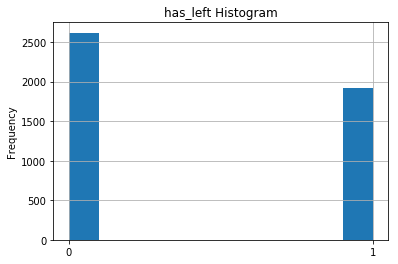

Percentage of class 0 = 58%
Percentage of class 1 = 42%


In [333]:
# histogram of target variable
df_raw["has_left"].hist()
plt.title("has_left Histogram")
plt.ylabel("Frequency")
plt.xticks([0,1])
plt.show()

class_pcts = (df_raw["has_left"].value_counts()/len(df_raw)*100).tolist()
classes_list = df_raw["has_left"].value_counts().index.tolist()
for c, v in zip(classes_list, class_pcts):
    print("Percentage of class %s = %.0f%%" % (c, v))

Turnover typically results in class imbalance. That is the case here, but the TRUE cases of turnover are not significantly smaller than the true cases of no turnover. Cases of turnover account for only 42% of turnover cases.

## Independent Variables
/Predictors

### employee_id

Column = employee_id
Data type = int64
count    4541.00000
mean     2277.49967
std      1316.14795
min         1.00000
25%      1138.00000
50%      2278.00000
75%      3416.00000
max      4557.00000
Name: employee_id, dtype: float64


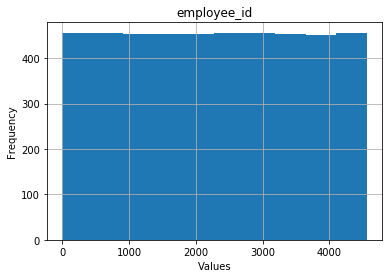

There is no duplication of ids: True

has_left
0    1930
1       1
Name: employee_id, dtype: int64

has_left
0    4557
1    1929
Name: employee_id, dtype: int64


In [338]:
# employee id
col = "employee_id"
basic_eda(df_raw, col)

# look for data problems
print("There is no duplication of ids: %s\n" % (df_raw["employee_id"].nunique() == len(df_raw)))

print(df_raw.groupby("has_left")["employee_id"].min())
print()
print(df_raw.groupby("has_left")["employee_id"].max())

Same number of employee id's as there are data points. Therefore there is no duplication of employee id. employee_id perfectly splits the data. For modelling purposes this column won't be of value as an input.

### f1

Column = f1
Data type = object
There are 17 classes in the f1 column


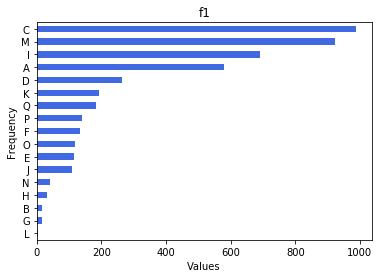

In [15]:
col = "f1"
basic_eda(df_raw, col)

The classes C, M, I and A have the highest frequency. 

### f2

Column = f2
Data type = object
There are 216 classes in the f2 column

Top 10 most frequent classes: 
Career Sales personnel                         1004
Junior Sales personnel                          761
Senior Sales Personnel                          456
Supervisor                                      207
Store Manager (Btw •À_1m and •À_3m)             107
Assistant Store Manager (Btw •À_10m-•À_30m)      91
Logistics Assistant/Operator                     91
CS Watchmaker                                    83
CS Administrator                                 73
Store Manager (Btw •À_3m and •À_5m)              72
Name: f2, dtype: int64

Bottom 5 least frequent classes: 
Visual Merchandiser            1
Finance Executive Assistant    1
Security Director              1
HRIS Specialist                1
Coordinator                    1
Name: f2, dtype: int64


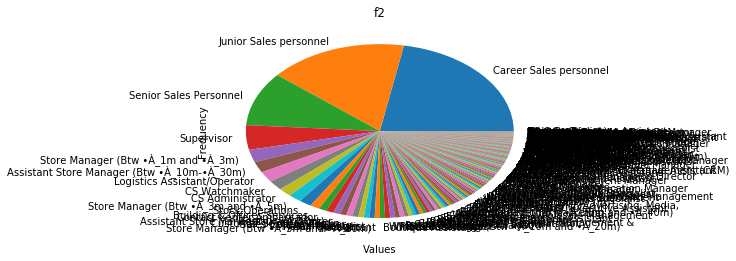

In [212]:
# f2
col = "f2"
basic_eda(df_raw, col)

There are too many unique classes in the f2 column to make one hot encoding it the clear best choice for modelling purposes. Alternative approaches would be embedding with t-SNE or a PCA. Otherwise, another more manual approach would be to group the roles into similar groupings based on business knowledge.  

### f3

Column = f3
Data type = object
There are 11 classes in the f3 column


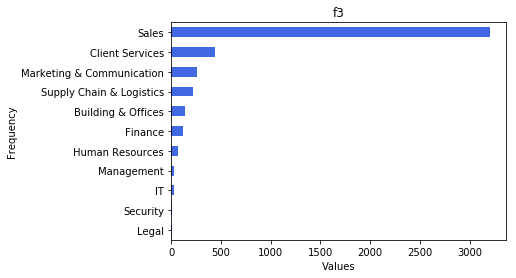

In [206]:
# f3
col = "f3"
basic_eda(df_raw, col)

f3 contains mostly Sales values. The low frequency of the other values makes grouping them to avoid dimensionality problems a decent option for modelling.

### f4

Column = f4
Data type = object
There are 67 classes in the f4 column

Top 10 most frequent classes: 
Career Sales personnel                         1004
Junior Sales personnel                          761
Senior Sales Personnel                          456
Supervisor                                      207
Store Manager (Btw •À_1m and •À_3m)             107
Assistant Store Manager (Btw •À_10m-•À_30m)      91
Logistics Assistant/Operator                     91
CS Watchmaker                                    83
CS Administrator                                 73
Store Manager (Btw •À_3m and •À_5m)              72
Name: f2, dtype: int64

Bottom 5 least frequent classes: 
Visual Merchandiser            1
Finance Executive Assistant    1
Security Director              1
HRIS Specialist                1
Coordinator                    1
Name: f2, dtype: int64


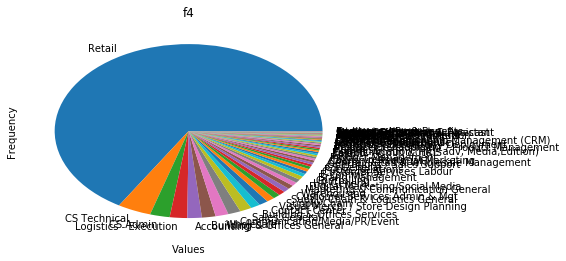

In [211]:
col = "f4"
basic_eda(df_raw, col)

Similar to f2, f4 contains many unique classes (67) and will need to be dealt with before modelling.

### f5

Column = f5
Data type = float64
count    4520.000000
mean        7.590044
std         1.732584
min         1.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        12.000000
Name: f5, dtype: float64


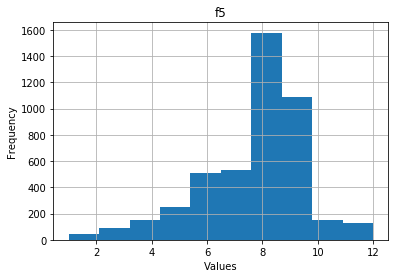

In [215]:
col = "f5"
basic_eda(df_raw, col)

f5 is the first float dtype column in the dataset. It is slightly skewed, containing a slightly higher frequency of larger values than smaller values. For this column, values around 8 are the most common.

### f6

Column = f6
Data type = float64
count    4541.000000
mean        2.288813
std         2.284957
min         0.500000
25%         0.500000
50%         1.000000
75%         3.000000
max        18.000000
Name: f6, dtype: float64


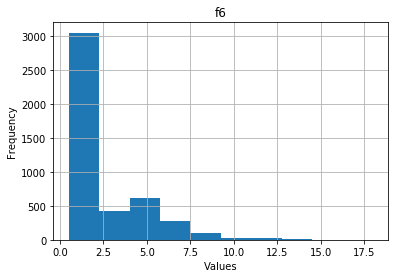

In [216]:
col = "f6"
basic_eda(df_raw, col)

f6 is the second float dtype column in the dataset. It is markedly skewed, containing a higher frequency of smaller values than larger values. For this column, values around 0 are the most common.

### f7

Column = f7
Data type = object
There are 24 classes in the f7 column


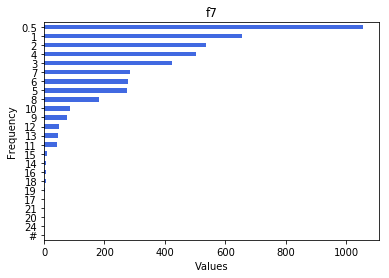

0.5    1056
1       654
2       537
4       503
3       425
7       285
6       279
5       276
8       183
10       87
9        75
12       51
13       47
11       43
15       11
14        7
16        7
18        6
19        4
21        1
20        1
24        1
17        1
#         1
Name: f7, dtype: int64

In [220]:
col = "f7"
basic_eda(df_raw, col)

df_raw["f7"].value_counts()

f7 contains a data issue where there is one "#" value where there should be a number. This will need to be dealt with before modelling. Because there is only one case where this is an issue, removing the offending row will be the easiest approach and the least likely to introduce error through incorrect imputation. This might be how long the employee has been working with the company.

### f8

Column = f8
Data type = int64
count    4541.000000
mean       32.892755
std         5.460728
min        18.000000
25%        29.000000
50%        32.000000
75%        36.000000
max        67.000000
Name: f8, dtype: float64


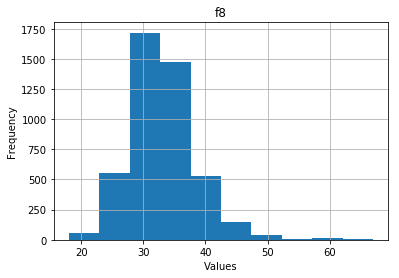

In [232]:
col = "f8"
basic_eda(df_raw, col)

f8 is the third float dtype column in the dataset. It is about normally distributed. For this column, values around 30 are the most common. This might be the employee's age.

### f9

Column = f9
Data type = object
There are 3 classes in the f9 column


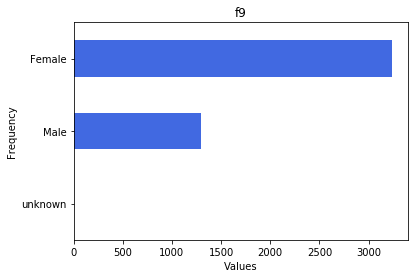

Female     3243
Male       1297
unknown       1
Name: f9, dtype: int64

In [234]:
col = "f9"
basic_eda(df_raw, col)

df_raw[col].value_counts()

f9 contains 3 classes. But one of these classes, "unknown", exists only once in the dataset. The easiest approach to deal with this column is to remove the "unknown" record, and binary encode it.

### f10

Column = f10
Data type = object
There are 19 classes in the f10 column


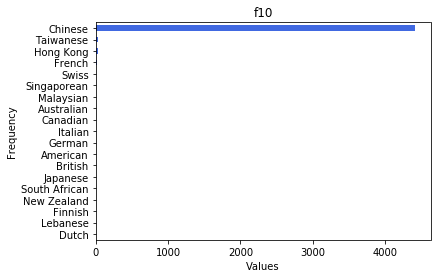

In [239]:
col = "f10"
basic_eda(df_raw, col)

Chinese is the most frequent value in f10. The lack of representation of the other classes makes it an option to group them all into a new class called "other" and then binary encode this as either Chinese or not Chinese.

### f11

Column = f11
Data type = int64
count    4541.000000
mean        0.061000
std         0.258811
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: f11, dtype: float64


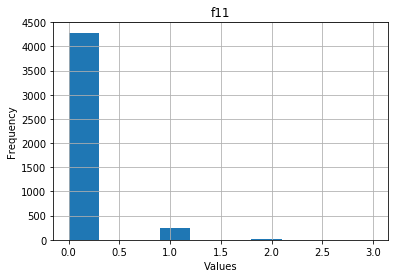

0    4284
1     239
2      16
3       2
Name: f11, dtype: int64

In [242]:
col = "f11"
basic_eda(df_raw, col)

df_raw[col].value_counts()

f11 could be a column with ordinal values.

### f12

Column = f12
Data type = object
There are 9 classes in the f12 column


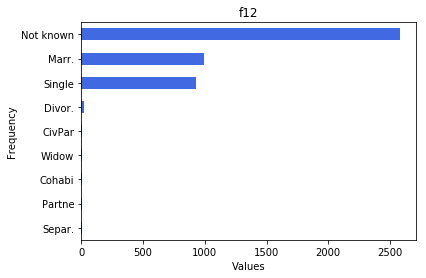

Not known    2582
Marr.         994
Single        928
Divor.         23
CivPar          5
Widow           3
Separ.          2
Partne          2
Cohabi          2
Name: f12, dtype: int64

In [244]:
col = "f12"
basic_eda(df_raw, col)

df_raw[col].value_counts()

Not known is the most common value here. Grouping other than Not known, Marr. and Single together into a new class called "Other" could be an option here.

### f13

Column = f13
Data type = int64
count    4541.000000
mean      102.708875
std        22.049539
min        65.000000
25%        84.000000
50%       103.000000
75%       122.000000
max       140.000000
Name: f13, dtype: float64


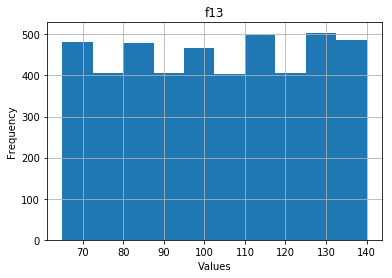

0     94
1    132
2    125
3    102
4     91
Name: f13, dtype: int64

In [246]:
col = "f13"
basic_eda(df_raw, col)

f13 contains a fairly uniform arrangement of integer values between 65 and 150.

# Data Cleaning

In [5]:
df = df_raw.dropna()
df = df.loc[df["f7"] != "#"]
df["f7"] = df["f7"].astype(float)

# f9
# remove the unknown record and binary encode the remaining two classes
df = df.loc[df["f9"] != "unknown"]
df = df.reset_index(drop=True)

le_f9 = LabelEncoder()
df["f9"] = le_f9.fit_transform(df["f9"])

numerical_cols = df.dtypes[df.dtypes != object].index.tolist()
df_num = df[numerical_cols]
df_num = df_num.drop("employee_id", axis=1)

### Numeric data: Pairplots and kde plots

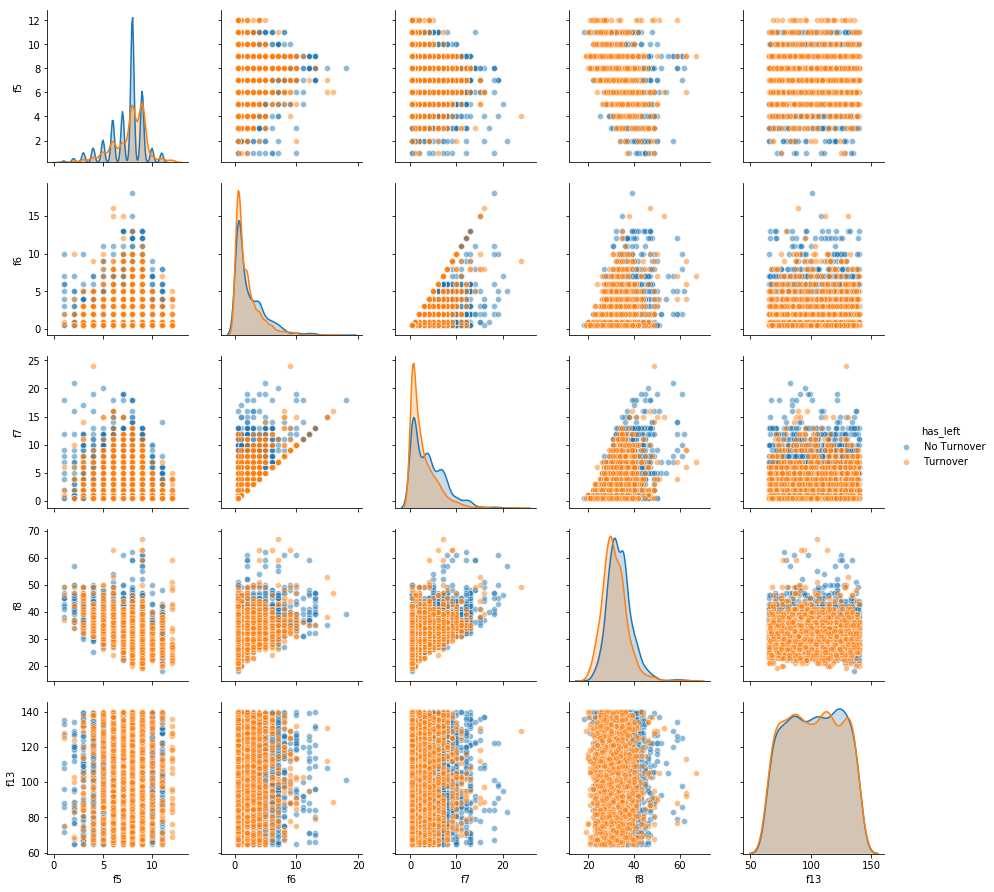

In [11]:
df_num_pairplot = df_num.copy()
df_num_pairplot["has_left"] = df_num_pairplot["has_left"].replace({0: "No Turnover", 1: "Turnover"})
del df_num_pairplot["f9"]
del df_num_pairplot["f11"]

sns.pairplot(df_num_pairplot, hue="has_left", plot_kws={'alpha': 0.5}, hue_order=["No Turnover", "Turnover"])
plt.show()

f5


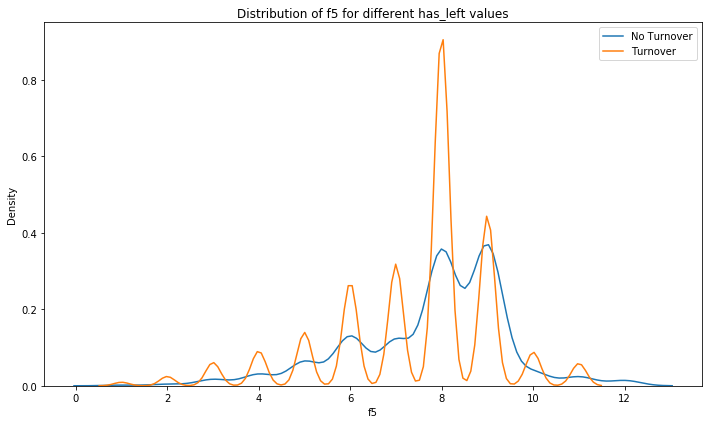

f6


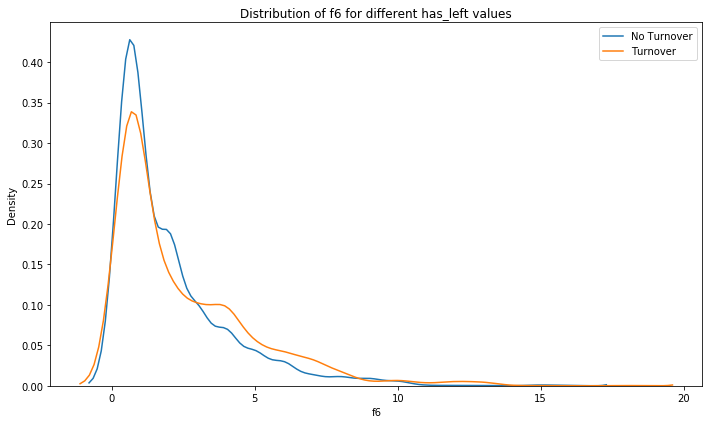

f7


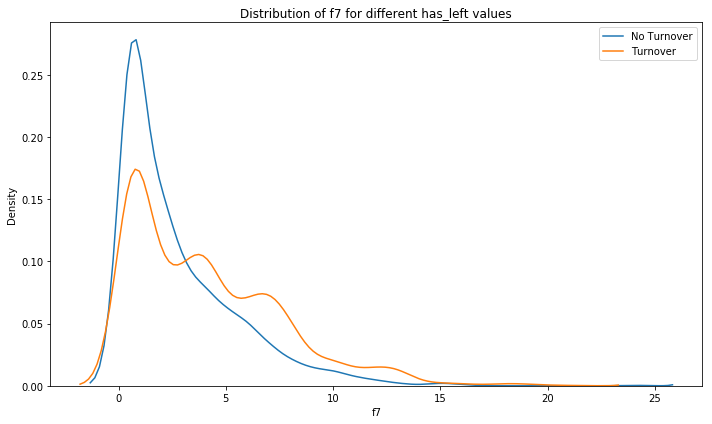

f8


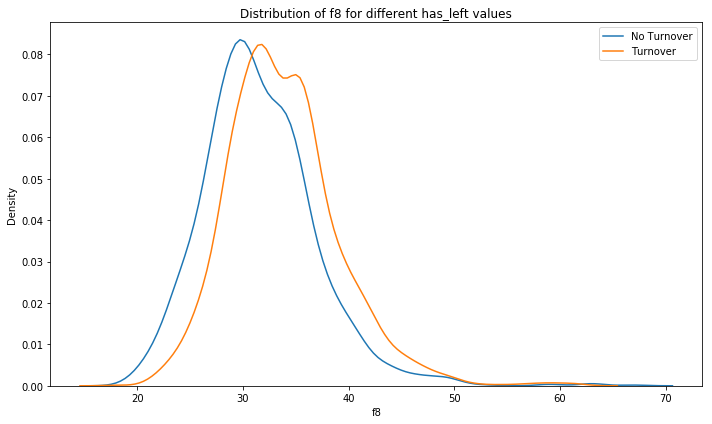

f9


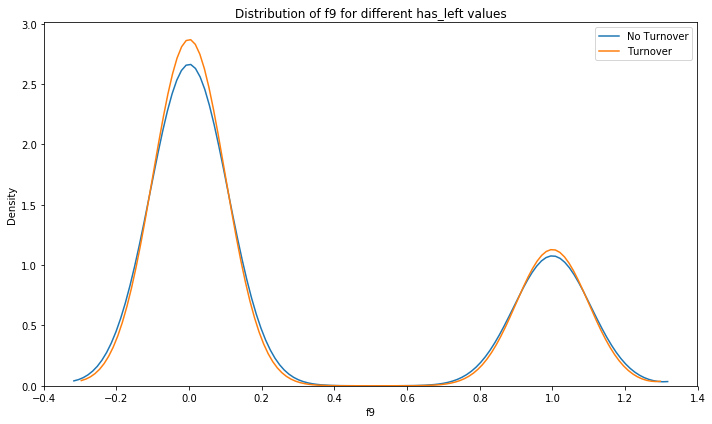

f11


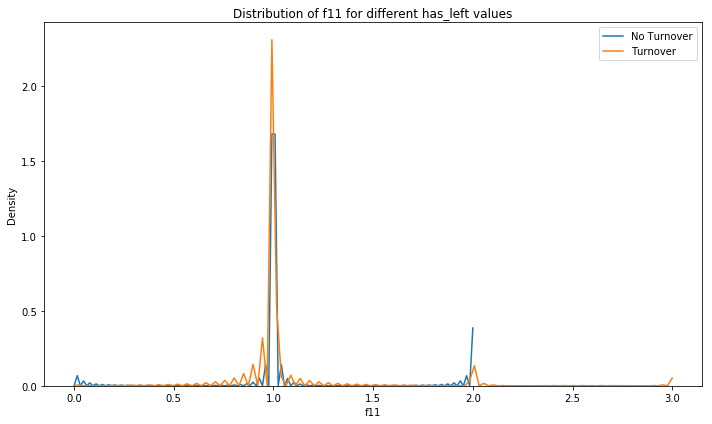

f13


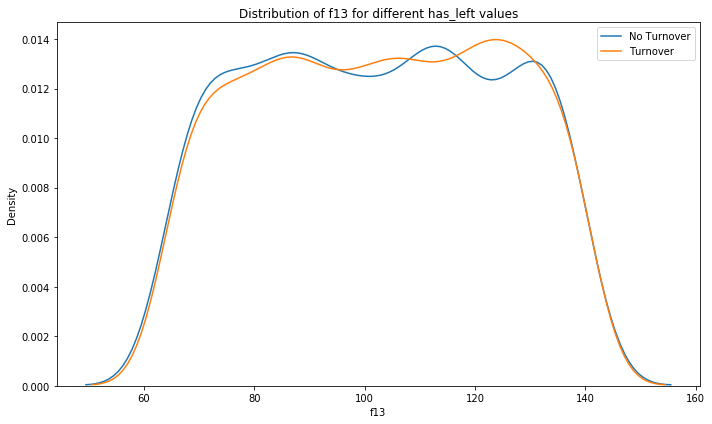

In [388]:
def kde_plot_var_values(df, col, figsize=(10, 6)):

    # distribution of ages for defaulters and non-defaulters

    plt.figure(figsize = figsize)

    # KDE plot of loans that were repaid on time
    sns.kdeplot(df.loc[df['has_left'] == 1, col], label = 'No Turnover')

    # KDE plot of loans which were not repaid on time
    sns.kdeplot(df.loc[df['has_left'] == 0, col], label = 'Turnover')

    # Labeling of plot
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title('Distribution of %s for different has_left values' % col)
    
    plt.tight_layout(h_pad = 2.5)
    
    plt.show()
    
for col in df_num:
    if col != "has_left":
        print(col)
        kde_plot_var_values(df_num, col, figsize=(10, 6))

# Preprocessing & Modelling

## Modelling functions

### Confusion Matrix

In [6]:
# %%writefile code/plot_confusion_matrix.py

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot.
    
    ** I added an update to normalize=True to also plot the raw numbers **

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions **and raw numbers**

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm_n = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:,}\n({:0.4f})".format(cm[i, j], cm_n[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### Evaluation

In [7]:
def output_metrics(clf, X, y, metric, printing=True, returning=True):
    if metric == average_precision_score:
        y_hat = clf.predict_proba(X)[:,1]
    else:
        y_hat = clf.predict(X)
    score = metric(y, y_hat)
    if printing:
        print(score)
    if returning:
        return score

In [8]:
def evaluate_model(clf, X_train_resample_scaled, X_test_scaled, y_train, y_test, df_in, scaler, ros, poly_transformer,
                   printing=True):
    # Get predictions
    y_hat_train = clf.predict(X_train_resample_scaled)
    y_hat_test = clf.predict(X_test_scaled)
    y_proba_test = clf.predict_proba(X_test_scaled)[:,1]


    # Confusion Matrix
    df_cm = confusion_matrix(y_test, y_hat_test, labels=[1, 0])
    
    if printing:
        plot_confusion_matrix(df_cm, 
                          target_names=[1, 0], 
                          title="%s Confusion Matrix" % (type(clf).__name__),
                          normalize=True)
    # accuracy metrics
    ap = average_precision_score(y_test, y_proba_test)
    ps = precision_score(y_test, y_hat_test)
    rs = recall_score(y_test, y_hat_test)
    roc = roc_auc_score(y_test, y_hat_test)
    
    output_d = {}
    output_d["clf"] = clf
    output_d["X_train_resample_scaled"] = X_train_resample_scaled
    output_d["X_test_scaled"] = X_test_scaled
    output_d["y_train"] = y_train
    output_d["y_test"] = y_test
    output_d["y_hat_train"] = y_hat_train
    output_d["y_hat_test"] = y_hat_test
    output_d["y_proba_test"] = y_proba_test
    output_d["df_cm"] = df_cm
    output_d["ap"] = ap
    output_d["ps"] = ps
    output_d["rs"] = rs
    output_d["roc"] = roc
    output_d["scaler"] = scaler
    output_d["poly_transformer"] = poly_transformer
    
    if printing:
        print("average_precision_score = {:.3f}".format(ap))
        print("precision_score = {:.3f}".format(ps))
        print("recall_score = {:.3f}".format(rs))
        print("roc_auc_score = {:.3f}".format(roc))
    
    if type(clf).__name__ == "RandomForestClassifier" or type(clf).__name__ == "XGBClassifier":
        df_feature_importances = pd.DataFrame(clf.feature_importances_, columns=["Importance"])
        col_names = df_in.columns.tolist()
        col_names.remove("has_left")
        df_feature_importances["Feature_names"] = col_names
        df_feature_importances.sort_values("Importance", ascending=False, inplace=True)
        df_feature_importances = df_feature_importances.round(4)
        output_d["df_feature_importances"] = df_feature_importances

        if printing:
            print(df_feature_importances)
    
    return output_d #[y_hat_train, y_hat_test, y_proba_test, df_cm, ap, ps, rs, roc]

### Preprocessing

In [2]:
%%writefile code/pre_ml_process.py
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

def pre_ml_process(df_in, 
                   test_size=0.33, 
                   train_test_split_random_state=42, 
                   RandomOverSampler_random_state=42):
    
    # Separate X and y
    y_col = "has_left"
    y = df_in[y_col]
    
    X = df_in.drop(y_col, axis=1)
    X = X.astype(float)

    # train test split
    X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=test_size, random_state=train_test_split_random_state)

    ros = RandomOverSampler(random_state=RandomOverSampler_random_state)
    X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)
    
    # scale predictors for the linear model
    scaler = MinMaxScaler()
    X_train_resample_scaled = scaler.fit_transform(X_train_resample)
    X_test_scaled = scaler.transform(X_test)

    return df_in, X, y, X_train, X_test, y_train, y_test, \
                scaler, X_train_resample_scaled, y_train_resample, \
                X_test_scaled, ros, None

def pre_ml_process_no_resample(df_in, 
                   test_size=0.33, 
                   train_test_split_random_state=42, 
                   RandomOverSampler_random_state=42):
    
    # Separate X and y
    y_col = "has_left"
    y = df_in[y_col]
    
    X = df_in.drop(y_col, axis=1)
    X = X.astype(float)

    # train test split
    X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=test_size, random_state=train_test_split_random_state)

    ros = None
    X_train_resample, y_train_resample = X_train, y_train
    
    # scale predictors for the linear model
    scaler = MinMaxScaler()
    X_train_resample_scaled = scaler.fit_transform(X_train_resample)
    X_test_scaled = scaler.transform(X_test)
    
    return df_in, X, y, X_train, X_test, y_train, y_test, \
                scaler, X_train_resample_scaled, y_train_resample, \
                X_test_scaled, ros, None


def pre_ml_process_resample_PolyFeatures(df_in, 
                   test_size=0.33, 
                   train_test_split_random_state=42, 
                   RandomOverSampler_random_state=42):
    
    # Separate X and y
    y_col = "has_left"
    y = df_in[y_col]
    
    X = df_in.drop(y_col, axis=1)
    X = X.astype(float)
    
    # Make a new dataframe for polynomial features
    input_poly_features_list = ['f5', 'f6', 'f7', 'f8', 'f11', 'f13']
    poly_features = X.loc[:,X.columns.isin(input_poly_features_list)]

    # Create the polynomial object with specified degree
    poly_transformer = PolynomialFeatures(degree = 3)
    
    # Fit and transform the poly_transformer to the data
    poly_features = poly_transformer.fit_transform(poly_features)
    
    poly_features = pd.DataFrame(
        poly_features, 
        columns = poly_transformer.get_feature_names(input_features = input_poly_features_list)
    )
    poly_features = poly_features.drop(input_poly_features_list, axis=1)
    if "1" in poly_features.columns:
        poly_features = poly_features.drop("1", axis=1)
    
    X = X.join(poly_features)

    # train test split
    X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=test_size, random_state=train_test_split_random_state)

    ros = RandomOverSampler(random_state=RandomOverSampler_random_state)
    X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)
    
    # scale predictors for the linear model
    scaler = MinMaxScaler()
    X_train_resample_scaled = scaler.fit_transform(X_train_resample)
    X_test_scaled = scaler.transform(X_test)
    
    df_out = pd.concat([X, y], axis=1)

    return df_out, X, y, X_train, X_test, y_train, y_test, \
                scaler, X_train_resample_scaled, y_train_resample, \
                X_test_scaled, ros, poly_transformer

Overwriting code/pre_ml_process.py


### Main - preprocess, train, evaluated and return outputs

In [3]:
%%writefile code/preprocess_train_eval.py
def preprocess_train_eval(df_in, 
                          LRC=LogisticRegression(solver="lbfgs", random_state=0), 
                          RFC=RandomForestClassifier(class_weight="balanced", n_estimators=100, random_state=0), 
                          
                          XG_params = {"random_state":0}, 
                          xgb_fit_eval_metric="aucpr",

                          printing=False, printing_ap=False, returning=True, split_random_state=42,
                          printing_rs=False,

                         train_test_split_random_state=42,
                         RandomOverSampler_random_state=42,
                         test_size=0.33,
                         preprocessing_function=pre_ml_process
                         ):
    
    df_in, X, y, X_train, X_test, y_train, y_test, \
                scaler, X_train_resample_scaled, y_train_resample, \
                X_test_scaled, ros, poly_transformer = \
                preprocessing_function(df_in, 
                               test_size,
                               train_test_split_random_state,
                               RandomOverSampler_random_state)

    outputs = {}
    
    # Train with Logistic Regression
    if LRC != None:
        clf_LR = LRC.fit(X_train_resample_scaled, y_train_resample)
        outputs_LR = evaluate_model(clf_LR, X_train_resample_scaled, X_test_scaled, y_train, y_test, 
                                    df_in, scaler, ros, poly_transformer, printing)
        if printing_ap:
            print("LR ap = {:.3f}".format(outputs_LR["ap"]))
        if printing_rs:
            print("LR rs = {:.3f}".format(outputs_LR["rs"]))
        outputs["LR"] = outputs_LR
    
    # Train with Random Forest Classifier
    if RFC != None:
        clf_RF = RFC.fit(X_train_resample_scaled, y_train_resample)
        outputs_RF = evaluate_model(clf_RF, X_train_resample_scaled, X_test_scaled, y_train, y_test, 
                                    df_in, scaler, ros, poly_transformer, printing)
        if printing_ap:
            print("RF ap = {:.3f}".format(outputs_RF["ap"]))
        if printing_rs:
            print("RF rs = {:.3f}".format(outputs_RF["rs"]))
        outputs["RF"] = outputs_RF

    
    # Train with XGBoost Classifier
    if XG_params != None:
        clf_XG = xgb.XGBClassifier()
        clf_XG.set_params(**XG_params)
        
        clf_XG.fit(X_train_resample_scaled, y_train_resample, eval_metric=xgb_fit_eval_metric)
        outputs_XG = evaluate_model(clf_XG, X_train_resample_scaled, X_test_scaled, y_train, y_test, 
                                    df_in, scaler, ros, poly_transformer, printing)
        if printing_ap:
            print("XG ap = {:.3f}".format(outputs_XG["ap"]))
        if printing_rs:
            print("XG rs = {:.3f}".format(outputs_XG["rs"]))
        outputs["XG"] = outputs_XG   
    
    if returning:
        return outputs

Overwriting code/preprocess_train_eval.py


## Baseline

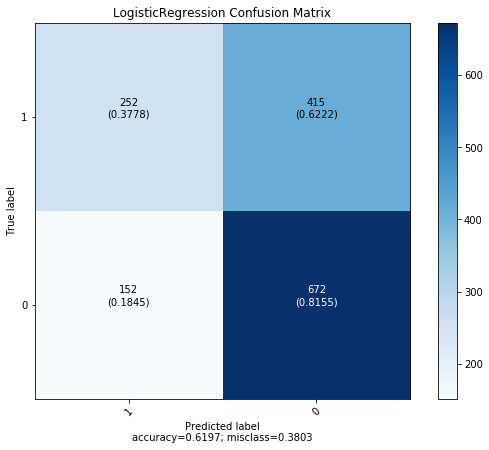

average_precision_score = 0.595
precision_score = 0.624
recall_score = 0.378
roc_auc_score = 0.597


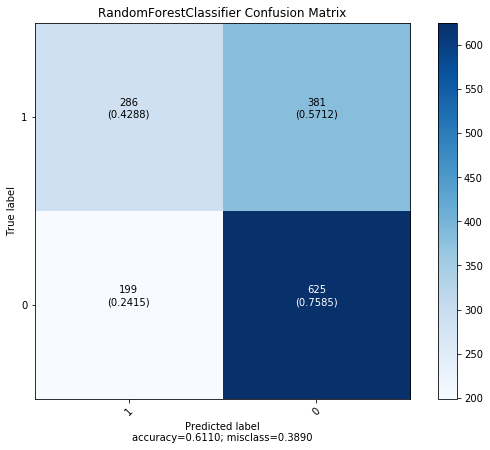

average_precision_score = 0.571
precision_score = 0.590
recall_score = 0.429
roc_auc_score = 0.594
   Importance Feature_names
6      0.3839           f13
3      0.2389            f8
0      0.1285            f5
2      0.1171            f7
1      0.0821            f6
4      0.0349            f9
5      0.0145           f11


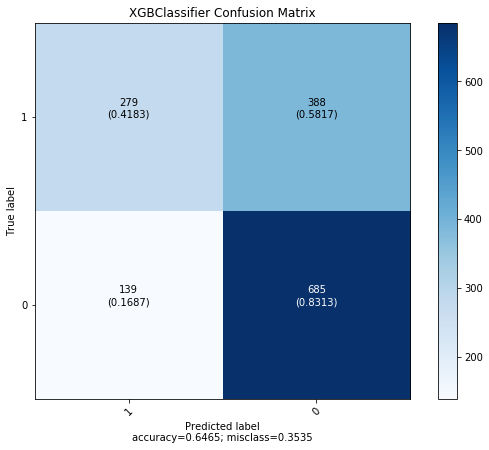

average_precision_score = 0.634
precision_score = 0.667
recall_score = 0.418
roc_auc_score = 0.625
   Importance Feature_names
6      0.2212           f13
0      0.2018            f5
3      0.1912            f8
2      0.1894            f7
1      0.1487            f6
5      0.0265           f11
4      0.0212            f9


In [28]:
# BASELINE: Isolate the numeric variables
clf_baseline_LR, clf_baseline_RF, clf_baseline_XG = preprocess_train_eval(df_num)

## Feature Engineering

### One hot encoding

In [35]:
def add_one_hot_encoded(df_baseline, df_to_ohe, col):
    df_ohe = pd.get_dummies(df_to_ohe[col], columns=col)
    df_out = df_baseline.join(df_ohe)
    return df_out

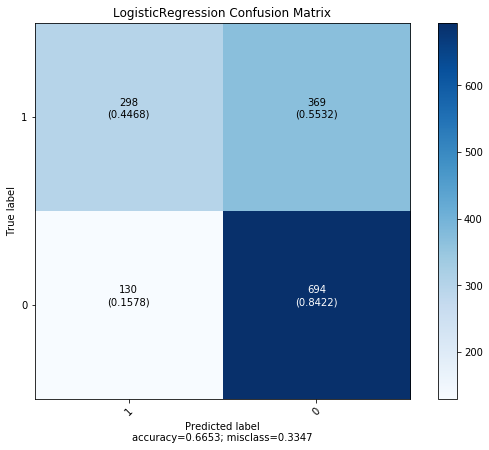

average_precision_score = 0.690
precision_score = 0.696
recall_score = 0.447
roc_auc_score = 0.645


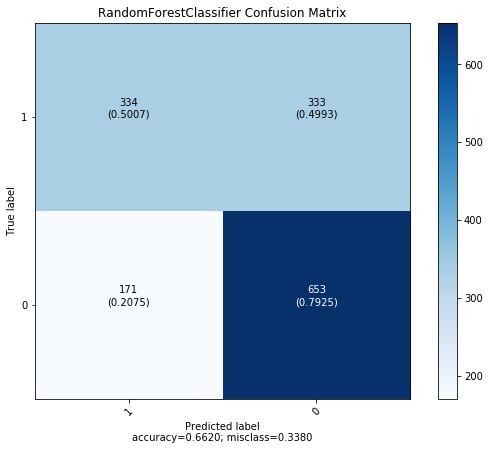

average_precision_score = 0.690
precision_score = 0.661
recall_score = 0.501
roc_auc_score = 0.647
    Importance Feature_names
6       0.2647           f13
3       0.2048            f8
2       0.1180            f7
0       0.1094            f5
1       0.0858            f6
7       0.0339          f1_A
4       0.0312            f9
21      0.0275          f1_O
9       0.0202          f1_C
19      0.0144          f1_M
15      0.0143          f1_I
5       0.0106           f11
10      0.0088          f1_D
23      0.0079          f1_Q
16      0.0077          f1_J
17      0.0076          f1_K
12      0.0065          f1_F
22      0.0065          f1_P
20      0.0059          f1_N
11      0.0058          f1_E
13      0.0037          f1_G
14      0.0024          f1_H
8       0.0022          f1_B
18      0.0003          f1_L


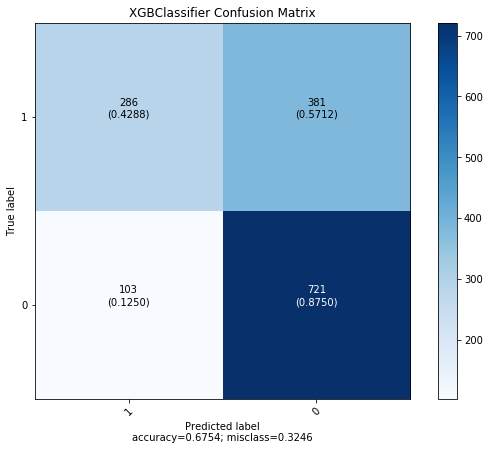

average_precision_score = 0.720
precision_score = 0.735
recall_score = 0.429
roc_auc_score = 0.652
    Importance Feature_names
2       0.1733            f7
6       0.1450           f13
3       0.1281            f8
0       0.1092            f5
1       0.0942            f6
21      0.0829          f1_O
7       0.0603          f1_A
9       0.0395          f1_C
13      0.0282          f1_G
20      0.0226          f1_N
19      0.0226          f1_M
15      0.0169          f1_I
4       0.0169            f9
11      0.0169          f1_E
16      0.0169          f1_J
23      0.0094          f1_Q
5       0.0094           f11
17      0.0038          f1_K
8       0.0019          f1_B
12      0.0019          f1_F
14      0.0000          f1_H
18      0.0000          f1_L
10      0.0000          f1_D
22      0.0000          f1_P


In [37]:
# f1 only
df_num_f1 = add_one_hot_encoded(df_num, df, ["f1"])
clf_f1_LR, clf_f1_RF, clf_f1_XG = preprocess_train_eval(df_num_f1)

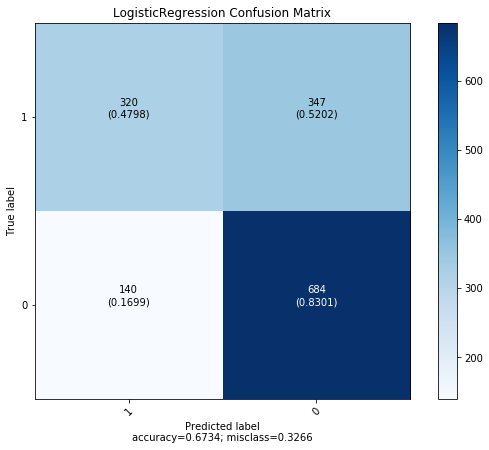

average_precision_score = 0.705
precision_score = 0.696
recall_score = 0.480
roc_auc_score = 0.655


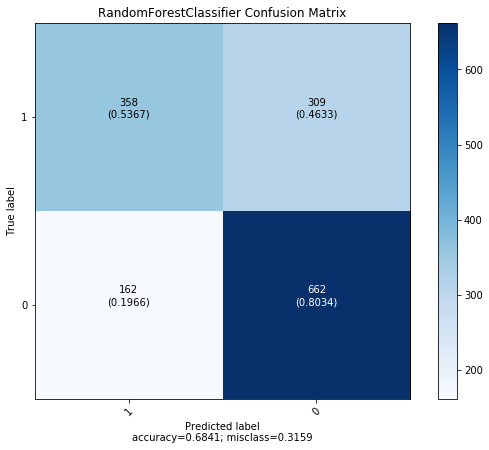

average_precision_score = 0.716
precision_score = 0.688
recall_score = 0.537
roc_auc_score = 0.670
    Importance              Feature_names
6       0.2417                        f13
3       0.1941                         f8
2       0.1130                         f7
0       0.0893                         f5
1       0.0824                         f6
4       0.0313                         f9
7       0.0305                       f1_A
21      0.0259                       f1_O
9       0.0220                       f1_C
24      0.0187         Building & Offices
32      0.0146                      Sales
15      0.0135                       f1_I
25      0.0126            Client Services
5       0.0101                        f11
19      0.0091                       f1_M
31      0.0088  Marketing & Communication
10      0.0085                       f1_D
16      0.0077                       f1_J
17      0.0076                       f1_K
23      0.0075                       f1_Q
12      0.0067     

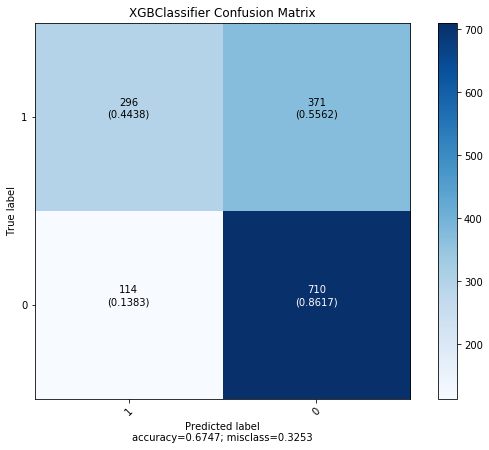

average_precision_score = 0.727
precision_score = 0.722
recall_score = 0.444
roc_auc_score = 0.653
    Importance              Feature_names
2       0.1515                         f7
1       0.1168                         f6
6       0.1168                        f13
3       0.1113                         f8
0       0.0894                         f5
21      0.0675                       f1_O
24      0.0493         Building & Offices
7       0.0474                       f1_A
9       0.0420                       f1_C
32      0.0274                      Sales
13      0.0237                       f1_G
4       0.0219                         f9
25      0.0219            Client Services
20      0.0182                       f1_N
11      0.0146                       f1_E
16      0.0146                       f1_J
19      0.0146                       f1_M
5       0.0128                        f11
31      0.0109  Marketing & Communication
15      0.0091                       f1_I
23      0.0091     

ValueError: too many values to unpack (expected 2)

In [131]:
df_num_f1_f3 = add_one_hot_encoded(df_num_f1, df, "f3")
clf_f1_f3_LR, clf_f1_f3_RF = preprocess_train_eval(df_num_f1_f3)

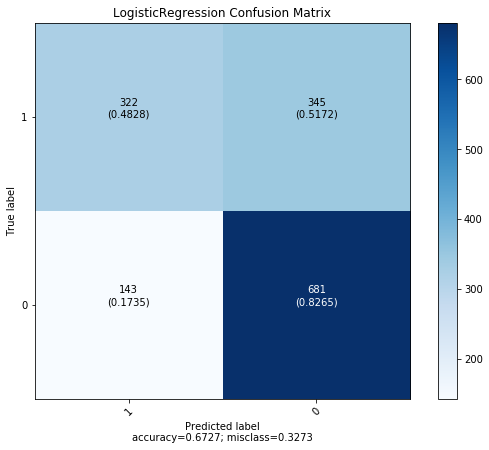

average_precision_score = 0.703
precision_score = 0.692
recall_score = 0.483
roc_auc_score = 0.655


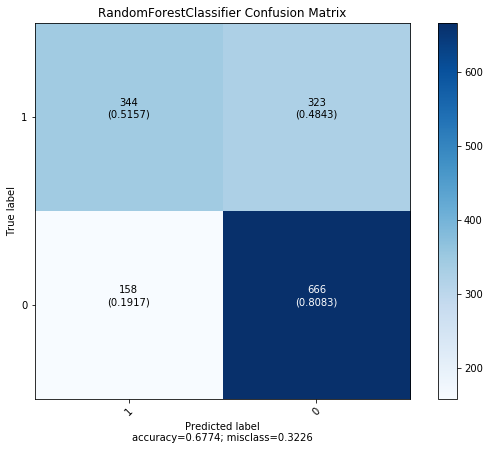

average_precision_score = 0.708
precision_score = 0.685
recall_score = 0.516
roc_auc_score = 0.662
    Importance              Feature_names
6       0.2399                        f13
3       0.1897                         f8
2       0.1127                         f7
0       0.0882                         f5
1       0.0800                         f6
7       0.0322                       f1_A
4       0.0300                         f9
21      0.0254                       f1_O
9       0.0225                       f1_C
24      0.0190         Building & Offices
15      0.0151                       f1_I
32      0.0142                      Sales
25      0.0129            Client Services
5       0.0099                        f11
19      0.0093                       f1_M
10      0.0088                       f1_D
31      0.0084  Marketing & Communication
23      0.0080                       f1_Q
17      0.0076                       f1_K
16      0.0071                       f1_J
12      0.0065     

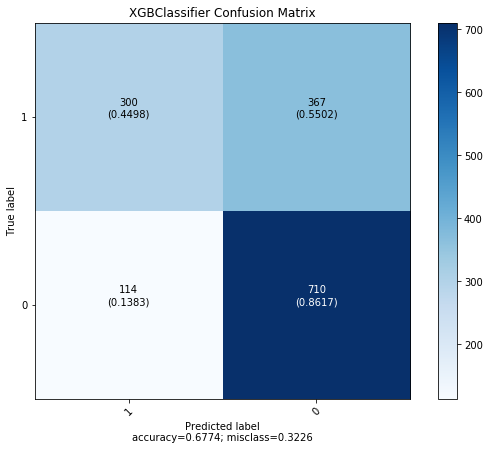

average_precision_score = 0.726
precision_score = 0.725
recall_score = 0.450
roc_auc_score = 0.656
    Importance              Feature_names
2       0.1463                         f7
3       0.1188                         f8
6       0.1170                        f13
1       0.1097                         f6
0       0.0878                         f5
21      0.0695                       f1_O
24      0.0494         Building & Offices
7       0.0457                       f1_A
9       0.0420                       f1_C
32      0.0329                      Sales
13      0.0238                       f1_G
20      0.0201                       f1_N
25      0.0201            Client Services
4       0.0183                         f9
11      0.0165                       f1_E
19      0.0146                       f1_M
16      0.0128                       f1_J
5       0.0128                        f11
23      0.0110                       f1_Q
31      0.0110  Marketing & Communication
15      0.0073     

ValueError: too many values to unpack (expected 2)

In [132]:
df_num_f1_f3_f10 = add_one_hot_encoded(df_num_f1_f3, df, "f10")
clf_f1_f3_f10_LR, clf_f1_f3_f10_RF = preprocess_train_eval(df_num_f1_f3_f10)

In [133]:
df_num_f1_f3_f10_f12 = add_one_hot_encoded(df_num, df, ["f1", "f3", "f10", "f12"])
clf_f1_f3_f10_f12_LR, clf_f1_f3_f10_f12_RF, clf_f1_f3_f10_f12_XG, \
output_LR, output_RF, output_XG = preprocess_train_eval(df_num_f1_f3_f10_f12, printing=False, printing_ap=True)

LR ap = 0.705
RF ap = 0.719
XG ap = 0.735


In [317]:
df_num_f1_f3_f10_f12 = add_one_hot_encoded(df_num, df, ["f1", "f3", "f10", "f12"])
op_allOHE = preprocess_train_eval(df_num_f1_f3_f10_f12, printing=False, printing_ap=True)

C:\Users\Kieron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LR ap = 0.735
RF ap = 0.698
XG ap = 0.747


### label encoding

In [40]:
def fit_label_encoders(df_in):
    fitted_label_encoders = {}
    for col in df_in.dtypes[df_in.dtypes == object].index.tolist():
        fitted_label_encoders[col] = LabelEncoder().fit(df_in[col])
    return fitted_label_encoders

def add_label_encoded(df_baseline, df_to_le, cols, fitted_label_encoders):
    df_out = df_baseline.copy()
    for col in cols:
        df_le = fitted_label_encoders[col].transform(df_to_le[col])
        df_out[col] = df_le
    return df_out

fitted_label_encoders = fit_label_encoders(df.drop("employee_id", axis=1))

df_num_allLE = add_label_encoded(df_num, df, ["f1", "f2", "f3", "f4", "f10", "f12"], fitted_label_encoders)

op_allLE = preprocess_train_eval(df_num_allLE, printing=False, printing_ap=True)

LR ap = 0.582
RF ap = 0.764
XG ap = 0.784


#### Recursive Feature Elimination

In [202]:
allLE_XG["df_feature_importances"]["Feature_names"]

,Importance,Feature_names
8,0.2160,f2
10,0.1565,f4
7,0.1487,f1
2,0.1033,f7
3,0.0798,f8
9,0.0798,f3
6,0.0751,f13
1,0.0689,f6
0,0.0329,f5
12,0.0203,f12


C:\Users\Kieron\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Kieron\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Kieron\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


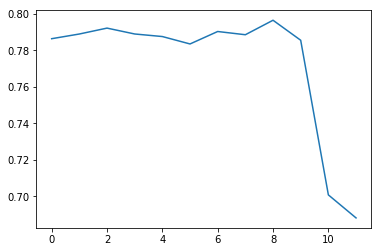

In [213]:
# recursive feature elimination
feature_elim_col_name = []
feature_elim_outputs_XG = []


for col in allLE_XG["df_feature_importances"].sort_values("Importance", ascending=True)["Feature_names"]:
    if len(feature_elim_col_name) < len(allLE_XG["df_feature_importances"]) - 1:
        feature_elim_col_name.append(col)
    
        fe_LR, fe_RF, fe_XG = preprocess_train_eval(df_num_allLE.drop(feature_elim_col_name, axis=1), printing=False, printing_ap=False)
        feature_elim_outputs_XG.append(fe_XG["ap"])
    
plt.plot([x for x in range(len(feature_elim_col_name))], feature_elim_outputs_XG)
plt.show()

No real difference as features with the lowest importance are eliminated

#### Polynomial features

In [461]:
from sklearn.preprocessing import PolynomialFeatures

# Make a new dataframe for polynomial features
input_poly_features_list = ['f5', 'f6', 'f7', 'f8', 'f11', 'f13']
poly_features = df[input_poly_features_list]

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

# Fit and transform the poly_transformer to the data
poly_features = poly_transformer.fit_transform(poly_features)
print('Polynomial Features shape: ', poly_features.shape)

# Create a dataframe of the features 
poly_features_corr = pd.DataFrame(
    poly_features, 
    columns = poly_transformer.get_feature_names(input_features = input_poly_features_list)
)

# Add in the target
poly_features_corr['has_left'] = df["has_left"].copy()

# Find the correlations with the target
poly_corrs = poly_features_corr.corr()['has_left'].sort_values()

# Display most correlated to TARGET
poly_corrs_df = pd.concat([poly_corrs, abs(poly_corrs)], axis=1).reset_index()
poly_corrs_df.columns = ["Var", "Corr", "Abs_Corr"]
poly_corrs_df.sort_values(by="Abs_Corr", ascending=False, inplace=True)
poly_corrs_df.reset_index(inplace=True, drop=True)
print("Most correlated engineered features to TARGET:")
poly_corrs_df.drop(0)

Polynomial Features shape:  (4518, 84)
Most correlated engineered features to TARGET:


,Var,Corr,Abs_Corr
1,f8,-0.200792,0.200792
2,f7 f8,-0.193978,0.193978
3,f7,-0.193034,0.193034
4,f5 f7 f8,-0.188745,0.188745
5,f7 f8 f13,-0.185034,0.185034
6,f5 f7,-0.182832,0.182832
7,f8^2,-0.182466,0.182466
8,f7 f8^2,-0.181727,0.181727
9,f7 f13,-0.181676,0.181676
10,f5 f7 f13,-0.171592,0.171592


In [532]:
print("No resampling:")
preprocess_train_eval(
    df_num_allLE, 
    printing=False, printing_ap=True, printing_rs=True, returning=False,
    preprocessing_function=pre_ml_process_no_resample)

print("\nResampling:")
preprocess_train_eval(
    df_num_allLE, 
    printing=False, printing_ap=True, printing_rs=True, returning=False)

print("\nResampling and Polynomial Features")
preprocess_train_eval(
    df_num_allLE, 
    printing=False, printing_ap=True, printing_rs=True, returning=False,
    preprocessing_function=pre_ml_process_resample_PolyFeatures)

No resampling:
LR ap = 0.609
LR rs = 0.345
RF ap = 0.760
RF rs = 0.577
XG ap = 0.796
XG rs = 0.544

Resampling:
LR ap = 0.607
LR rs = 0.686
RF ap = 0.755
RF rs = 0.617
XG ap = 0.792
XG rs = 0.677

Resampling and Polynomial Features
LR ap = 0.611
LR rs = 0.633
RF ap = 0.616
RF rs = 0.530
XG ap = 0.770
XG rs = 0.666


#### Dividing Features

In [ ]:
# todo - also try dividing each column by every other column as I did with the credit default project

#### Hyperparameter Tuning

In [594]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import time

df_ignore, X, y, X_train, X_test, y_train, y_test, \
        scaler, X_train_resample_scaled, y_train_resample, \
        X_test_scaled, ros, poly = pre_ml_process(df_num_allLE, 
                                                  train_test_split_random_state=0, 
                                                  RandomOverSampler_random_state=0)

    
param_grid = {
        'max_depth': [3, 6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

# param_grid = {
#         'silent': [True],
#         'max_depth': [3, 6, ],
#         'n_estimators': [100]}

clf=xgb.XGBClassifier()

rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=100,
                            n_jobs=1, verbose=0, cv=5,
#                             scoring='neg_log_loss', 
                            refit=True, random_state=42)


print("Randomized search..")
search_time_start = time.time()
rs_clf.fit(X_train_resample_scaled, y_train_resample, eval_metric='aucpr')
print("Randomized search time:", time.time() - search_time_start, "\n")

best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Randomized search..
Randomized search time: 133.29478764533997 

Best score: 0.8025114155251142
Best params: 
colsample_bylevel: 0.9
colsample_bytree: 1.0
gamma: 0.25
learning_rate: 0.2
max_depth: 10
min_child_weight: 0.5
n_estimators: 100
reg_lambda: 0.1
subsample: 0.9


In [575]:
op_allLE["XG"]["clf"].get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1}

In [599]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import time

df_ignore, X, y, X_train, X_test, y_train, y_test, \
        scaler, X_train_resample_scaled, y_train_resample, \
        X_test_scaled, ros, poly = pre_ml_process(df_num_allLE, 
                                                  train_test_split_random_state=0, 
                                                  RandomOverSampler_random_state=0)

clf_best_rs = xgb.XGBClassifier()
clf_best_rs.set_params(**best_params)
clf_best_rs.fit(X_train_resample_scaled, y_train_resample, eval_metric='aucpr')

metrics = [average_precision_score, recall_score, precision_score, roc_auc_score]
metric_names = ["average_precision_score", "recall_score", "precision_score", "roc_auc_score"]

for metric, m_name in zip(metrics, metric_names):
    orig = output_metrics(op_allLE["XG"]["clf"], X_test_scaled, y_test, metric, printing=False)
    rsbest = output_metrics(clf_best_rs, X_test_scaled, y_test, metric, printing=False)
    print("{}:\n\tDefault Hyper Params: {}\n\tRandSer Hyper Params: {}".format(m_name, orig, rsbest))

average_precision_score:
	Default Hyper Params: 0.791637245409303
	RandSer Hyper Params: 0.7846121859733777
recall_score:
	Default Hyper Params: 0.6765163297045101
	RandSer Hyper Params: 0.6516329704510109
precision_score:
	Default Hyper Params: 0.7131147540983607
	RandSer Hyper Params: 0.7065767284991569
roc_auc_score:
	Default Hyper Params: 0.7350742025881042
	RandSer Hyper Params: 0.7232221456028639


The default hyper parameters out performed a randomised hyper parameter search when the trained algorithms were evaluated on the test set. This is likely due to the best random search model overfitting its training data

#### Increasing n_estimators

In [598]:
df_ignore, X, y, X_train, X_test, y_train, y_test, \
        scaler, X_train_resample_scaled, y_train_resample, \
        X_test_scaled, ros, poly = pre_ml_process(df_num_allLE, 
                                                  train_test_split_random_state=0, 
                                                  RandomOverSampler_random_state=0)

clf_XG_10000 = xgb.XGBClassifier(random_state=0, n_estimators=1000)

clf_XG_10000.fit(X_train_resample_scaled, y_train_resample, eval_metric='aucpr')

metrics = [average_precision_score, recall_score, precision_score, roc_auc_score]
metric_names = ["average_precision_score", "recall_score", "precision_score", "roc_auc_score"]

for metric, m_name in zip(metrics, metric_names):
    orig = output_metrics(op_allLE["XG"]["clf"], X_test_scaled, y_test, metric, printing=False)
    rsbest = output_metrics(clf_XG_10000, X_test_scaled, y_test, metric, printing=False)
    print("{}:\n\tDefault Hyper Params: {}\n\tRandSer Hyper Params: {}".format(m_name, orig, rsbest))

average_precision_score:
	Default Hyper Params: 0.791637245409303
	RandSer Hyper Params: 0.8336194904347973
recall_score:
	Default Hyper Params: 0.6765163297045101
	RandSer Hyper Params: 0.6920684292379471
precision_score:
	Default Hyper Params: 0.7131147540983607
	RandSer Hyper Params: 0.7355371900826446
roc_auc_score:
	Default Hyper Params: 0.7350742025881042
	RandSer Hyper Params: 0.7516945919774641


Increasing the number of estimators improves model performance

In [13]:
# FE
df_ignore, X, y, X_train, X_test, y_train, y_test, \
        scaler, X_train_resample_scaled, y_train_resample, \
        X_test_scaled, ros, poly = pre_ml_process(df_num_allLE, 
                                                  train_test_split_random_state=0, 
                                                  RandomOverSampler_random_state=0)

clf_XG_10000 = xgb.XGBClassifier(random_state=0, n_estimators=1000)

clf_XG_10000.fit(X_train_resample_scaled, y_train_resample, eval_metric='aucpr')

metrics = [average_precision_score, recall_score, precision_score, roc_auc_score]
metric_names = ["average_precision_score", "recall_score", "precision_score", "roc_auc_score"]

for metric, m_name in zip(metrics, metric_names):
    orig = output_metrics(op_allLE["XG"]["clf"], X_test_scaled, y_test, metric, printing=False)
    rsbest = output_metrics(clf_XG_10000, X_test_scaled, y_test, metric, printing=False)
    print("{}:\n\tDefault Hyper Params: {}\n\tRandSer Hyper Params: {}".format(m_name, orig, rsbest))

average_precision_score:
	Default Hyper Params: 0.811149658792298
	RandSer Hyper Params: 0.8336194904347973
recall_score:
	Default Hyper Params: 0.6749611197511665
	RandSer Hyper Params: 0.6920684292379471
precision_score:
	Default Hyper Params: 0.7368421052631579
	RandSer Hyper Params: 0.7355371900826446
roc_auc_score:
	Default Hyper Params: 0.746089050441621
	RandSer Hyper Params: 0.7516945919774641


In [16]:
clf_XG_10000

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [21]:
df_feature_importances = pd.DataFrame(clf_XG_10000.feature_importances_, columns=["Importance"])
col_names = df_num_allLE.columns.tolist()
col_names.remove("has_left")
df_feature_importances["Feature"] = col_names
df_feature_importances.sort_values("Importance", ascending=False, inplace=True)
df_feature_importances = df_feature_importances.round(4)
df_feature_importances.reset_index(drop=True)

,Importance,Feature
0,0.1805,f13
1,0.1619,f2
2,0.1485,f8
3,0.1065,f7
4,0.0970,f4
5,0.0920,f1
6,0.0628,f6
7,0.0482,f5
8,0.0304,f12
9,0.0277,f3


#### Subtracting features

In [12]:
df_num_allLE_subtr = df_num_allLE.copy()
num_cols = ['f5', 'f6', 'f7', 'f8', 'f13']
for i in num_cols:
    for j in num_cols:
        if i!=j:
            df_num_allLE_subtr["{}-{}".format(i, j)] = df_num_allLE[i] - df_num_allLE[j]

df_ignore, X, y, X_train, X_test, y_train, y_test, \
        scaler, X_train_resample_scaled, y_train_resample, \
        X_test_scaled, ros, poly = pre_ml_process(df_num_allLE_subtr, 
                                                  train_test_split_random_state=0, 
                                                  RandomOverSampler_random_state=0)

clf_XG_10000 = xgb.XGBClassifier(random_state=0, n_estimators=10000)

clf_XG_10000.fit(X_train_resample_scaled, y_train_resample, eval_metric='aucpr')

metrics = [average_precision_score, recall_score, precision_score, roc_auc_score]
metric_names = ["average_precision_score", "recall_score", "precision_score", "roc_auc_score"]

for metric, m_name in zip(metrics, metric_names):
    rsbest = output_metrics(clf_XG_10000, X_test_scaled, y_test, metric, printing=False)
    print("{}:\n\t{}\n".format(m_name, rsbest))

average_precision_score:
	0.7491484983569943

recall_score:
	0.6360808709175739

precision_score:
	0.6650406504065041

roc_auc_score:
	0.6965781713078435



In [49]:
df_num_allLE_subtr = df_num_allLE.copy()
num_cols = ['f5', 'f6', 'f7', 'f8', 'f13']
for i in num_cols:
    for j in num_cols:
        if i!=j:
            df_num_allLE_subtr["{}-{}".format(i, j)] = df_num_allLE[i] - df_num_allLE[j]

df_ignore, X, y, X_train, X_test, y_train, y_test, \
        scaler, X_train_resample_scaled, y_train_resample, \
        X_test_scaled, ros, poly = pre_ml_process(df_num_allLE_subtr, 
                                                  train_test_split_random_state=0, 
                                                  RandomOverSampler_random_state=0)

clf_XG_10000 = xgb.XGBClassifier(random_state=0, n_estimators=10000)

clf_XG_10000.fit(X_train_resample_scaled, y_train_resample, eval_metric='aucpr')

metrics = [average_precision_score, recall_score, precision_score, roc_auc_score]
metric_names = ["average_precision_score", "recall_score", "precision_score", "roc_auc_score"]

for metric, m_name in zip(metrics, metric_names):
    rsbest = output_metrics(clf_XG_10000, X_test_scaled, y_test, metric, printing=False)
    print("{}:\n\t{}\n".format(m_name, rsbest))

average_precision_score:
	0.7491484983569943

recall_score:
	0.6360808709175739

precision_score:
	0.6650406504065041

roc_auc_score:
	0.6965781713078435



## PCA Dimensionality Reduction

### PCA f2

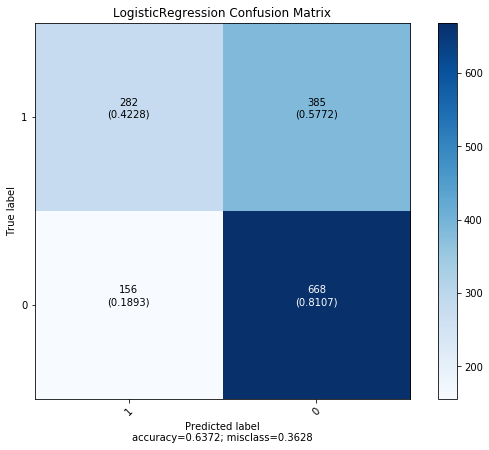

average_precision_score = 0.630
precision_score = 0.644
recall_score = 0.423
roc_auc_score = 0.617


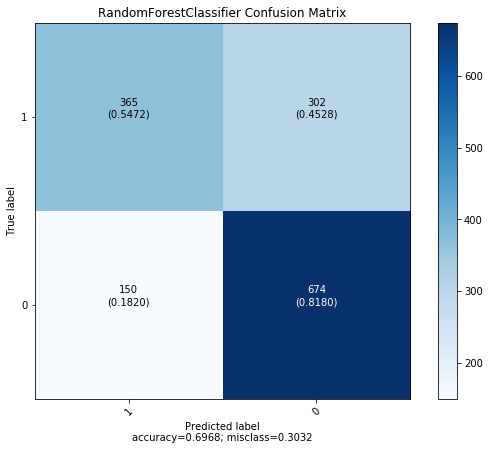

average_precision_score = 0.734
precision_score = 0.709
recall_score = 0.547
roc_auc_score = 0.683
    Importance Feature_names
6       0.2572           f13
3       0.1814            f8
2       0.1074            f7
1       0.0756            f6
0       0.0484            f5
15      0.0356             8
7       0.0342             0
8       0.0317             1
14      0.0305             7
11      0.0294             4
4       0.0294            f9
12      0.0291             5
16      0.0287             9
10      0.0242             3
13      0.0240             6
9       0.0205             2
5       0.0125           f11


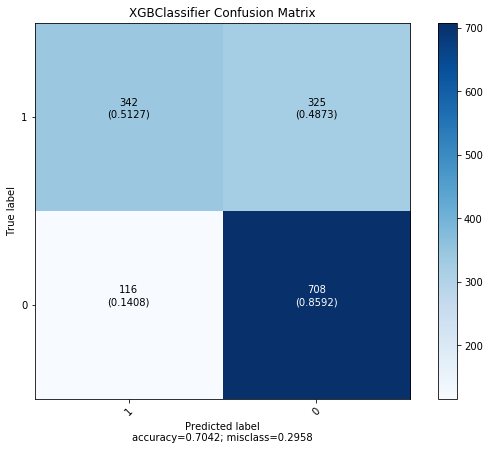

average_precision_score = 0.756
precision_score = 0.747
recall_score = 0.513
roc_auc_score = 0.686
    Importance Feature_names
12      0.1840             5
2       0.1258            f7
6       0.1195           f13
3       0.1148            f8
7       0.0991             0
1       0.0896            f6
0       0.0487            f5
13      0.0440             6
11      0.0299             4
10      0.0252             3
8       0.0252             1
16      0.0236             9
15      0.0220             8
9       0.0189             2
5       0.0142           f11
14      0.0142             7
4       0.0016            f9
LR ap = 0.630
RF ap = 0.734
XG ap = 0.756


In [91]:
cols = "f2"
df_f2_ohe = pd.get_dummies(df[cols])
pca_f2 = PCA(n_components=10).fit(df_f2_ohe)
df_f2_pca = pd.DataFrame(pca_f2.transform(df_f2_ohe))
df_num_f2 = df_num.reset_index(drop=True).join(df_f2_pca)

clf_f2_LR, clf_f2_RF, clf_f2_XG, \
            output_LR, output_RF, output_XG = preprocess_train_eval(df_num_f2, printing=True, printing_ap=True)

### PCA f2 and join to ohe'd others

In [134]:
cols = "f2"
df_f2_ohe = pd.get_dummies(df[cols])
pca_f2 = PCA(n_components=10).fit(df_f2_ohe)
df_f2_pca = pd.DataFrame(pca_f2.transform(df_f2_ohe))
df_num_f2 = df_num.reset_index(drop=True).join(df_f2_pca)

df_num_f1_f3_f10_f12_PCAf2 = add_one_hot_encoded(df_num_f2, df.reset_index(drop=True), ["f1", "f3", "f10", "f12"])

clf_f1_f3_f10_f12_PCAf2_LR, clf_f1_f3_f10_f12_PCAf2_RF, clf_f1_f3_f10_f12_PCAf2_XG, \
            output_LR, output_RF, output_XG = preprocess_train_eval(df_num_f1_f3_f10_f12_PCAf2, 
                                                                    printing=False, printing_ap=True, 
                                                                    returning_model_and_ap_only=True)

LR ap = 0.716
RF ap = 0.813
XG ap = 0.807


In [ ]:
# todo - pca f4!

### PCA all categoricals

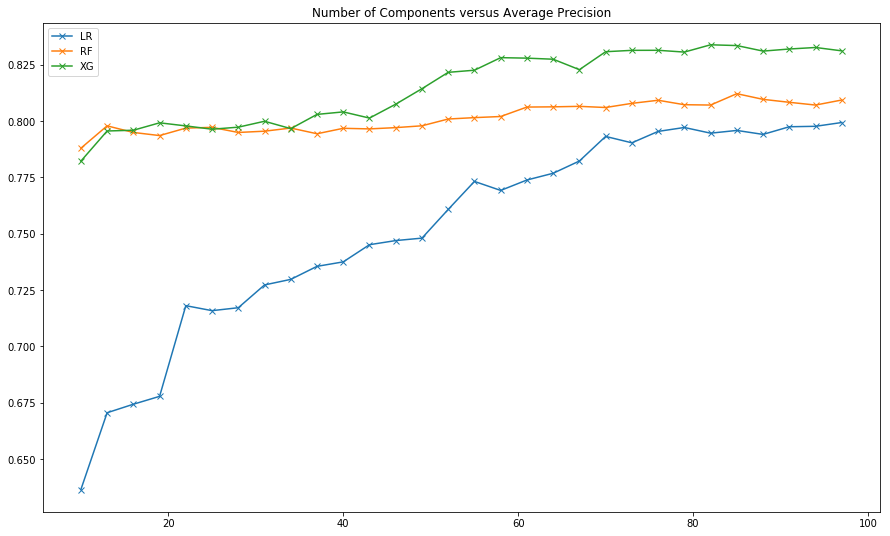

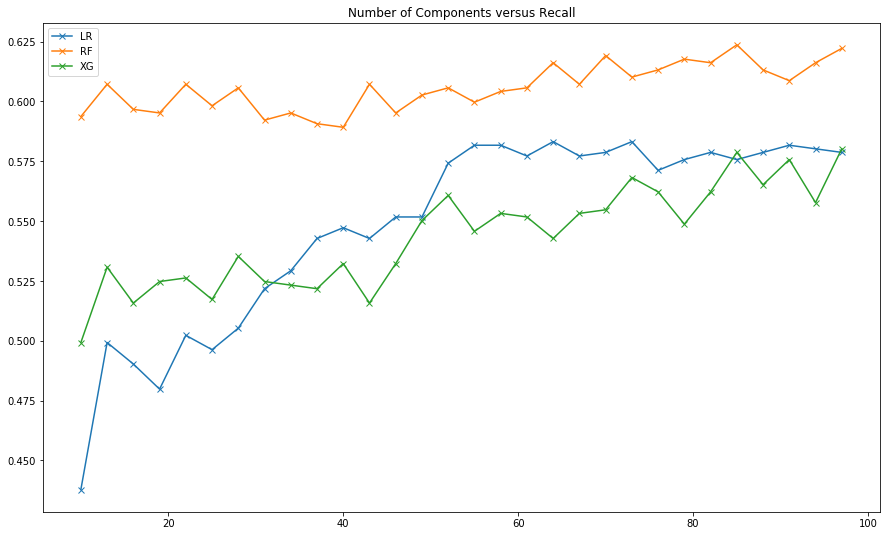

In [143]:
cols = ["f1", "f2", "f3", "f10", "f12"]
df_all_ohe = pd.get_dummies(df[cols])

n_components_list = []
ap_LR_list = []
ap_RF_list = []
ap_XG_list = []

rs_LR_list = []
rs_RF_list = []
rs_XG_list = []

for i in range(10, 100, 3):

    pca_all = PCA(n_components=i).fit(df_all_ohe)
    df_allPCA = pd.DataFrame(pca_all.transform(df_all_ohe))
    df_num_allPCA = df_num.reset_index(drop=True).join(df_allPCA)

    clf_allPCA_LR, clf_allPCA_RF, clf_allPCA_XG, \
                output_LR, output_RF, output_XG = preprocess_train_eval(df_num_allPCA, printing=False, printing_ap=False,
                                                                       returning_model_and_ap_only=False)
    
    n_components_list.append(i)
    ap_LR_list.append(output_LR[4])
    ap_RF_list.append(output_RF[4])
    ap_XG_list.append(output_XG[4])
    
    rs_LR_list.append(output_LR[6])
    rs_RF_list.append(output_RF[6])
    rs_XG_list.append(output_XG[6])
    
plt.figure(figsize=(15, 9))
plt.plot(n_components_list, ap_LR_list, "x-", label="LR")
plt.plot(n_components_list, ap_RF_list, "x-", label="RF")
plt.plot(n_components_list, ap_XG_list, "x-", label="XG")
plt.legend(loc="best")
plt.title("Average Precision against Number of Components")
plt.show()

plt.figure(figsize=(15, 9))
plt.plot(n_components_list, rs_LR_list, "x-", label="LR")
plt.plot(n_components_list, rs_RF_list, "x-", label="RF")
plt.plot(n_components_list, rs_XG_list, "x-", label="XG")
plt.legend(loc="best")
plt.title("Recall against Number of Components")
plt.show()

60 components is where the gain in accuracy levels off for the three algorithms.

In [318]:
cols = ["f1", "f2", "f3", "f10", "f12"]
df_all_ohe = pd.get_dummies(df[cols])


pca_all = PCA(n_components=60).fit(df_all_ohe)
df_allPCA = pd.DataFrame(pca_all.transform(df_all_ohe))
df_num_allPCA = df_num.reset_index(drop=True).join(df_allPCA)


op_allPCA = preprocess_train_eval(df_num_allPCA, printing=False, printing_ap=True)

LR ap = 0.784
RF ap = 0.797
XG ap = 0.832


# Feature Selection

#Todos

Feature Selection
- Train large number of shallow trees (2 levels) with each tree being trained on a small number of attributes (3). then a score calculated on the attribute usage statistics tells us the most predictive attributes
- backward feature elimination: iteratively remove feature with lowest importance and retrain. stop when error rate reaches tolerance 

- iteratively train on each feature ohe'd, 
- keep only the highest importance in the core set and separate the others to be PCA'd
- Then evaluate on the highest importance ohe'd features join others PCA'd


- Do the same thing except train on the final separated features only, and PCA the most important of these and remove the others
Then combine these PCA'd with the highest importance ohe'd features

Rewrite model evaluation code with option to use cross valiation

embed the least important features but keep the others
retrain with only most important features

Inferences and Feature Importances

Feature Engineering
include one-hot categoricals (w and w/o "Other"), embeding for categoricals with many classes, combinations of numeric features

LIME